In [1]:
!pip3 install pyensembl
!pyensembl install --release 99 --species mus_musculus


  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
^C
Operation cancelled by user
2020-05-19 12:08:08,460 - pyensembl.shell - INFO - Running 'install' for EnsemblRelease(release=99, species='mus_musculus')
2020-05-19 12:08:08,839 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /home/siddarth/.cache/pyensembl/GRCm38/ensembl99/Mus_musculus.GRCm38.cdna.all.fa.gz.pickle
2020-05-19 12:08:08,887 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /home/siddarth/.cache/pyensembl/GRCm38/ensembl99/Mus_musculus.GRCm38.ncrna.fa.gz.pickle
2020-05-19 12:08:08,981 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /home/siddarth/.cache/pyensembl/GRCm38/ensembl99/Mus_musculus.GRCm38.pep.all.fa.gz.pickle


In [64]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pyensembl import EnsemblRelease

In [65]:
#from google.colab import drive
#drive.mount('/content/drive')

In [93]:
# dataFilePath = "/content/drive/My Drive/ScRNA_data/GSE109262_ESC_RNA_counts.txt"
#dataFilePath = "../data/GSE109262_ESC_RNA_counts.txt"
dataFilePath = "../data/removed_zero_expression_genes.csv"

In [98]:
#df = pd.read_csv(dataFilePath,sep='\t')
df = pd.read_csv(dataFilePath,sep=',')

In [99]:
df.head(20)

,ESC_ens_id,ESC_A01,ESC_A02,ESC_A03,ESC_A04,ESC_A05,ESC_A06,ESC_A07,ESC_A08,ESC_A09,...,ESC_E02.12,ESC_E03.12,ESC_E04.12,ESC_E05.12,ESC_E06.12,ESC_E07.12,ESC_E08.12,ESC_E09.12,ESC_E10.12,ESC_F01.12
0,ENSMUSG00000025902,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSMUSG00000033845,0,653,246,297,464,277,548,346,838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSMUSG00000025903,0,481,261,181,118,320,352,280,560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSMUSG00000033813,0,513,670,269,180,103,171,233,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ENSMUSG00000002459,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ENSMUSG00000033793,0,405,941,190,148,157,231,326,141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ENSMUSG00000025905,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ENSMUSG00000025907,0,469,166,66,64,0,0,51,126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ENSMUSG00000087247,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ENSMUSG00000051285,0,36,219,78,1,2,0,25,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df_ids = df['ESC_ens_id']

In [101]:
df_ids.head(20)

0     ENSMUSG00000025902
1     ENSMUSG00000033845
2     ENSMUSG00000025903
3     ENSMUSG00000033813
4     ENSMUSG00000002459
5     ENSMUSG00000033793
6     ENSMUSG00000025905
7     ENSMUSG00000025907
8     ENSMUSG00000087247
9     ENSMUSG00000051285
10    ENSMUSG00000025909
11    ENSMUSG00000061024
12    ENSMUSG00000025911
13    ENSMUSG00000025912
14    ENSMUSG00000045210
15    ENSMUSG00000025915
16    ENSMUSG00000046101
17    ENSMUSG00000099032
18    ENSMUSG00000025916
19    ENSMUSG00000025917
Name: ESC_ens_id, dtype: object

In [102]:
ensembl = EnsemblRelease(species="mouse")

In [103]:
def rpkm(counts, lengths):
    """Calculate reads per kilobase transcript per million reads.

    RPKM = (10^9 * C) / (N * L)

    Where:
    C = Number of reads mapped to a gene
    N = Total mapped reads in the experiment
    L = Exon length in base pairs for a gene

    Parameters
    ----------
    counts: array, shape (N_genes, N_samples)
        RNAseq (or similar) count data where columns are individual samples
        and rows are genes.
    lengths: array, shape (N_genes,)
        Gene lengths in base pairs in the same order
        as the rows in counts.

    Returns
    -------
    normed : array, shape (N_genes, N_samples)
        The RPKM normalized counts matrix.
    """
    N = np.sum(counts, axis=0)  # sum each column to get total reads per sample
    L = lengths
    C = counts

    normed = 1e9 * C / (N[np.newaxis, :] * L[:, np.newaxis])

    return(normed)


In [104]:
gene = ensembl.gene_by_id('ENSMUSG00000025900')

In [105]:
tr_lengths = []
for i in df_ids:
  try:
    gene = ensembl.gene_by_id(i)
    start = gene.start
    end = gene.end
  except ValueError:
    start = 0
    end = 10000
  tr_lengths.append(end-start)

In [106]:
tr_lengths = np.asarray(tr_lengths)

In [107]:
df = df.drop('ESC_ens_id',axis=1)
data = df.to_numpy()

In [108]:
norm_data = rpkm(data,tr_lengths)

In [109]:
norm_data.shape

(15760, 1023)

In [110]:
from sklearn.feature_selection import VarianceThreshold

In [111]:
norm_data = norm_data.T

In [112]:
select = VarianceThreshold(threshold=(250000))
norm_data = select.fit_transform(norm_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
norm_data.shape

In [ ]:
norm_data

In [ ]:
model = KMeans(n_clusters=4)

In [ ]:
model.fit(norm_data)

In [113]:
labels = model.predict(norm_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [114]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 0 0]


In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
plot_data = pca.fit_transform(norm_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

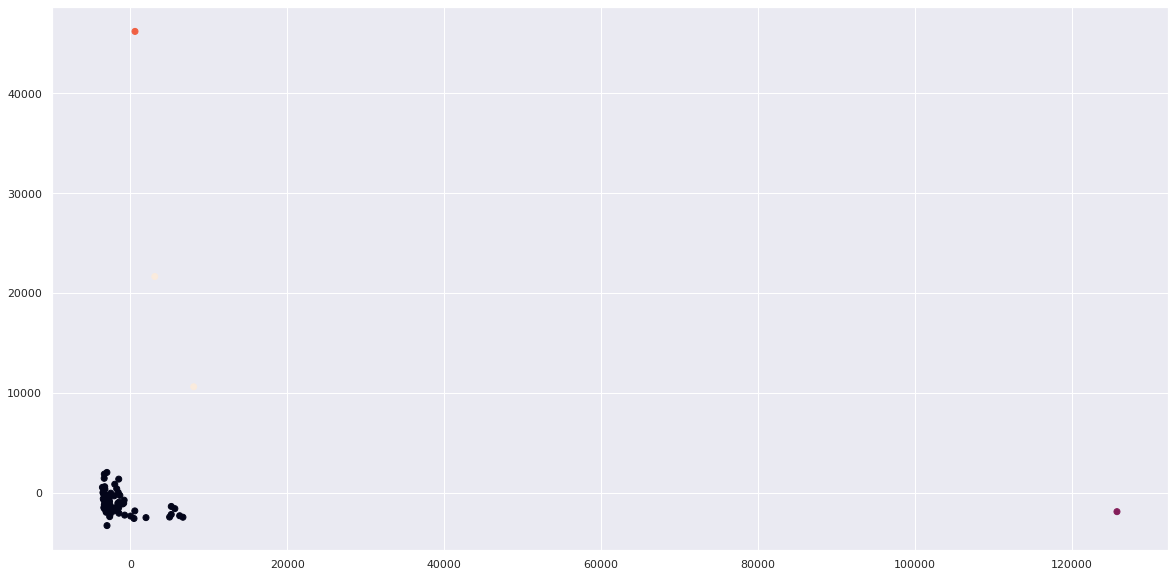

In [89]:
plt.figure(figsize=(20,10))
plt.scatter(plot_data[:,0],plot_data[:,1],c = labels)

In [90]:
from sklearn.manifold import TSNE

In [91]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(norm_data)

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 1394.771666
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.490967
[t-SNE] KL divergence after 300 iterations: 0.829636


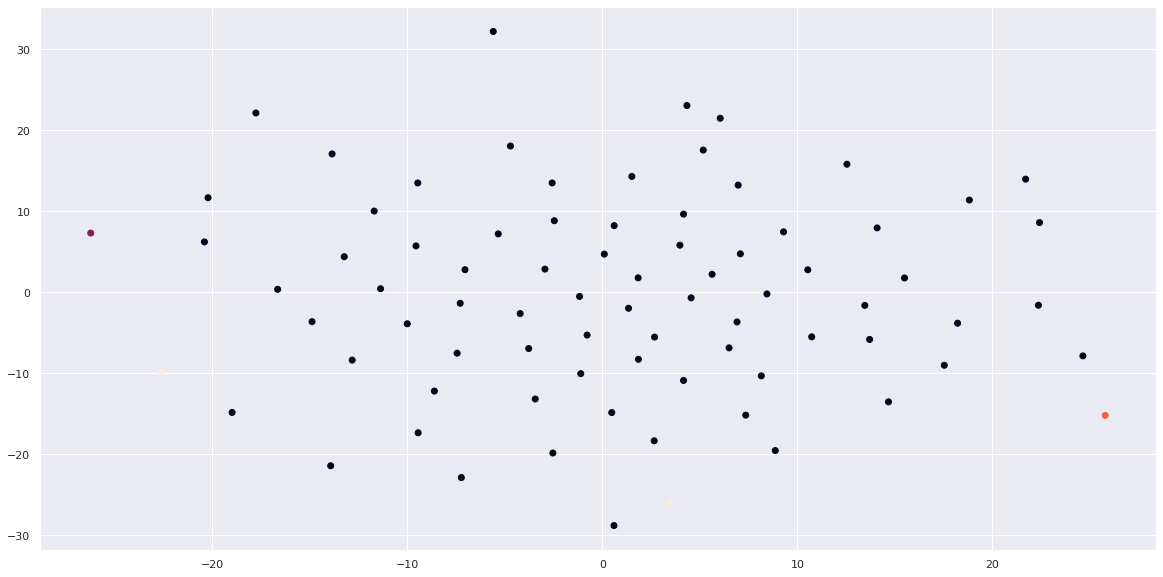

In [92]:
plt.figure(figsize=(20,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1],c = labels)

In [30]:
name_cells_unformatted = df.T.columns.values
name_cells_unformatted

array([    0,     1,     2, ..., 22081, 22082, 22083])

In [31]:
name_cells = name_cells_unformatted[1:]
name_cells

array([    1,     2,     3, ..., 22081, 22082, 22083])

In [32]:
labelled_cluster = dict(zip(name_cells, labels))

# The Final Clusters

In [33]:
i = 0
for i in range(10):
    print("Cluster " + str(i) + ":")
    for cell, cluster in labelled_cluster.items():
        if cluster == i:
            print(cell)
    i += 1

Cluster 0:
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
52
53
54
55
56
57
58
59
60
61
62
63
65
66
67
68
69
70
72
73
74
75
76
77
78
79
80
Cluster 1:
51
Cluster 2:
64
71
Cluster 3:
32
Cluster 4:
Cluster 5:
Cluster 6:
Cluster 7:
Cluster 8:
Cluster 9:
